In [19]:
using Polyhedra
using Plots
using CDDLib

In [54]:
include("active_sets.jl")

act

In [55]:
T = [1 0; 0 1; -1 0; 0 -1]
Z = [2, 2, 2, 2]
model, z, x = act.mpc_model(SimpleHRepresentation(T, Z))
solve(model)
model

x0 = [0.0,0.0]


Minimization problem with:
 * 8 linear constraints
 * 4 variables
Solver is Gurobi

In [56]:
crmodel = act.critical_region(model, z, x)

GA = 


Feasibility problem with:
 * 8 linear constraints
 * 2 variables
Solver is default solver


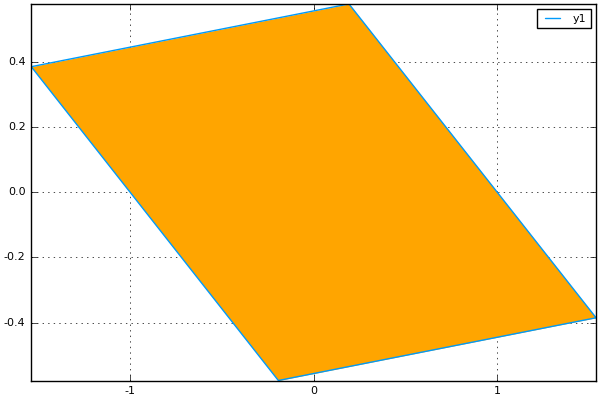

In [57]:
crpoly = SimpleHRepresentation(act.simplify(polyhedron(crmodel, CDDLibrary())))
vr = SimpleVRepresentation(polyhedron(crmodel, CDDLibrary()))
plot(vr.V[[1:end; 1],1], vr.V[[1:end; 1],2], fill=(0,:orange))

In [58]:
model, z, x = mpc_model(SimpleHRepresentation(vcat(T, [0.1 -0.9]), vcat(Z, [-0.5])))
# constraint_to_cross = 4
# @constraint model crpoly.A[constraint_to_cross, :]' * x .<= crpoly.b[constraint_to_cross]
# @constraint model [-1, -1.4]' * x .>= 1
solve(model)
model

x0 = [-1.87747,0.470234]


Minimization problem with:
 * 8 linear constraints
 * 4 variables
Solver is Gurobi

In [59]:
crmodel = act.critical_region(model, z, x)
crmodel

GA = [0.0 1.0; -1.0 0.0]


Feasibility problem with:
 * 10 linear constraints
 * 2 variables
Solver is default solver

In [64]:
polyhedron(crmodel, CDDLibrary())

CDDLib.CDDPolyhedron{2,Float64}(Nullable{CDDLib.CDDInequalityMatrix{2,Float64,S<:Union{CDDLib.GMPRational,Float64}}}(H-representation
begin
 10 3 real
 2.0 -0.0 -0.0
 1.1102230246251565e-16 1.1102230246251565e-16 2.220446049250313e-16
 -0.0 -0.0 -0.0
 2.0 -1.1102230246251565e-16 -2.220446049250313e-16
 0.55 0.049999999999999996 -0.97
 0.5 0.0049999999999999906 -1.0350000000000001
 0.45 -0.049999999999999996 0.97
 0.5 -0.0049999999999999906 1.0350000000000001
 -0.997 -1.0417 -1.5013
 -1.003 1.1474 1.6094
end),Nullable{CDDLib.CDDGeneratorMatrix{2,Float64,S<:Union{CDDLib.GMPRational,Float64}}}(),Nullable{CDDLib.CDDPolyhedra{2,Float64,S}}(),false,false,false,false)

In [63]:

crpoly = SimpleHRepresentation(act.simplify(polyhedron(crmodel, CDDLibrary())))
# vr = SimpleVRepresentation(polyhedron(crmodel, CDDLibrary()))
# plot(vr.V[[1:end; 1],1], vr.V[[1:end; 1],2], fill=(0,:orange))

ConvexHull.ConvexHullPolyhedron{2,Float64}(Nullable{Polyhedra.HRepresentation{2,Float64}}(),Nullable{Polyhedra.LiftedHRepresentation{2,Float64}}(),Nullable{Polyhedra.VRepresentation{2,Float64}}(V-representation
begin
 0 3 real
end),Nullable{Polyhedra.LiftedVRepresentation{2,Float64}}(),false,false,false,false)